# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("London_Bike_DataSet.csv")

In [3]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,4/1/2015 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,4/1/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,4/1/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,4/1/2015 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,4/1/2015 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3


# Feature Engineering

In [5]:
import datetime as dt
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df.timestamp.dt.month
df['day'] = df.timestamp.dt.day
df['hour'] = df.timestamp.dt.hour
df['year'] = df.timestamp.dt.year
df = df[['year','month','day','hour','cnt','t1','t2','hum','wind_speed',
         'weather_code','is_holiday','is_weekend','season']]

In [6]:
year_dummies = pd.get_dummies(df['year'], prefix='year')
month_dummies = pd.get_dummies(df['month'], prefix='month')
day_dummies = pd.get_dummies(df['day'], prefix='day')
hour_dummies = pd.get_dummies(df['hour'], prefix='hour')
df = pd.concat([df, year_dummies], axis=1)
df = pd.concat([df, month_dummies], axis=1)
df = pd.concat([df, day_dummies], axis=1)
df = pd.concat([df, hour_dummies], axis=1)
df = df.drop(['year', 'month', 'day', 'hour'], axis=1)

In [7]:
weather_dummies = pd.get_dummies(df['weather_code'], prefix='weather')
season_dummies = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, weather_dummies], axis=1)
df = pd.concat([df, season_dummies], axis=1)
df = df.drop('season', axis=1)
df = df.drop('weather_code', axis=1)

In [8]:
df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,year_2015,year_2016,year_2017,...,weather_2,weather_3,weather_4,weather_7,weather_10,weather_26,season_0,season_1,season_2,season_3
0,182,3.0,2.0,93.0,6.0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,138,3.0,2.5,93.0,5.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,134,2.5,2.5,96.5,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,72,2.0,2.0,100.0,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,47,2.0,0.0,93.0,6.5,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df['cnt'] = pd.cut(df['cnt'], bins=[0,1143,7861], right = False, labels=[0,1])
df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,year_2015,year_2016,year_2017,...,weather_2,weather_3,weather_4,weather_7,weather_10,weather_26,season_0,season_1,season_2,season_3
0,0,3.0,2.0,93.0,6.0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,3.0,2.5,93.0,5.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2.5,2.5,96.5,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,2.0,2.0,100.0,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2.0,0.0,93.0,6.5,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,year_2015,year_2016,year_2017,...,weather_2,weather_3,weather_4,weather_7,weather_10,weather_26,season_0,season_1,season_2,season_3
0,0,3.0,2.0,93.0,6.0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,3.0,2.5,93.0,5.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2.5,2.5,96.5,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,2.0,2.0,100.0,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2.0,0.0,93.0,6.5,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Feature scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
df_cluster = df.copy()
sc = MinMaxScaler()
X = sc.fit_transform(df.drop(['cnt'],axis = 1))
y = df['cnt']

# Model training

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70, shuffle=True,random_state=42, stratify=y)

In [13]:
print(X_train.shape)
print(X_test.shape)

(12189, 87)
(5225, 87)


# Logistic Regression (Lean Wei Liang)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=42)

parameters = [{'penalty':['l1','l2'], 
              'C':[1, 10, 100, 1000]}]



gs_logreg = GridSearchCV( estimator=logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


gs_logreg.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [15]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n'.format(gs_logreg.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :', (gs_logreg.best_params_), '\n')

# print estimator that was chosen by the GridSearch
print('Estimator that was chosen by the search :', (gs_logreg.best_estimator_), '\n')

GridSearch CV best score : 0.8718

Parameters that give the best results : {'C': 1, 'penalty': 'l1'} 

Estimator that was chosen by the search : LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear') 



In [16]:
#training set score and test set score is used to check overfitting
print('Training set score: {:.4f}'.format(gs_logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gs_logreg.score(X_test, y_test)))

Training set score: 0.8750
Test set score: 0.8735


In [17]:
y_pred = gs_logreg.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

# Performance measure

Text(0.5, 1.1, 'Confusion matrix')

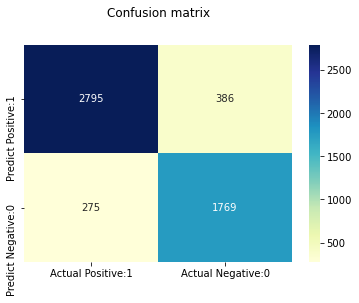

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                            index=['Predict Positive:1', 'Predict Negative:0']), 
                annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3181
           1       0.82      0.87      0.84      2044

    accuracy                           0.87      5225
   macro avg       0.87      0.87      0.87      5225
weighted avg       0.88      0.87      0.87      5225



# K Nearest Neighbors (Lean Wei Liang)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
#Tune the parameter of knn like which is n_neighbors
parameters = {'n_neighbors':np.arange(1,51)}
knn = KNeighborsClassifier()
gs_knn= GridSearchCV(knn,param_grid = parameters,cv=10)
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [21]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n'.format(gs_knn.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :', (gs_knn.best_params_), '\n')

# print estimator that was chosen by the GridSearch
print('Estimator that was chosen by the search :', (gs_knn.best_estimator_), '\n')

GridSearch CV best score : 0.8339

Parameters that give the best results : {'n_neighbors': 23} 

Estimator that was chosen by the search : KNeighborsClassifier(n_neighbors=23) 



In [22]:
print('Training set score: {:.4f}'.format(gs_knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gs_knn.score(X_test, y_test)))

Training set score: 0.8546
Test set score: 0.8367


Text(0.5, 15.0, 'Predicted label')

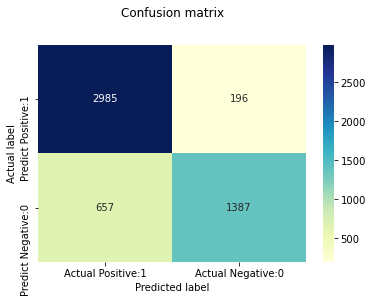

In [23]:
y_pred = gs_knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0']), 
                annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      3181
           1       0.88      0.68      0.76      2044

    accuracy                           0.84      5225
   macro avg       0.85      0.81      0.82      5225
weighted avg       0.84      0.84      0.83      5225



# **Random Forest Classifier (Seow Kai Sheng)**

In [25]:
#import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
parameters = [{'n_estimators' : [100,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = rf, param_grid = parameters)
gs_rf = grid_search.fit(X_train, y_train)
best_parameters = gs_rf.best_params_
best_accuracy = gs_rf.best_score_

best_parameters

{'max_features': 'auto', 'n_estimators': 300}

In [26]:
rf = RandomForestClassifier(n_estimators = 200, max_features = 'auto', random_state = 42) 
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [27]:
y_pred_rf = rf.predict(X_test)

In [28]:
#import MAE 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_rf)

0.05952153110047847

In [29]:
#import cv score
from sklearn.model_selection import cross_val_score
accuracy_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =10)
accuracy_rf.mean()

0.9318232393237343

In [30]:
rf.score(X_train, y_train)

1.0

In [31]:
rf.score(X_test, y_test)

0.9404784688995216

In [32]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)

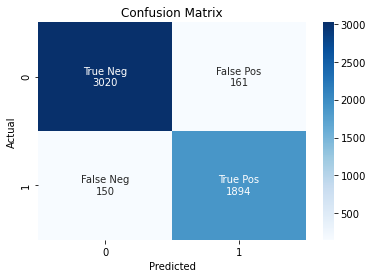

In [33]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts_rf = ["{0:0.0f}".format(value) for value in matrix_rf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts_rf)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_rf, annot=labels, fmt='', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [34]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3181
           1       0.92      0.93      0.92      2044

    accuracy                           0.94      5225
   macro avg       0.94      0.94      0.94      5225
weighted avg       0.94      0.94      0.94      5225



# **Decision Tree Classifier (Seow Kai Sheng)**

In [35]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=50)

parameters = [{'max_depth' : [10, 15, 20] ,'min_samples_leaf' : [15, 20, 25] ,'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = dtree, param_grid = parameters)
gs_dtree = grid_search.fit(X_train, y_train)
best_parameters = gs_dtree.best_params_
best_accuracy = gs_dtree.best_score_

best_parameters

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 15}

In [36]:
dtree = DecisionTreeClassifier(max_depth=20, random_state=50, max_features = 'auto', min_samples_leaf=15)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=15,
                       random_state=50)

In [37]:
y_pred_dtree = dtree.predict(X_test)

In [38]:
mean_absolute_error(y_test, y_pred_dtree)

0.14870813397129187

In [39]:
accuracy_dtree = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv =10)
accuracy_dtree.mean()

0.8318967874553289

In [40]:
dtree.score(X_train, y_train)

0.8600377389449504

In [41]:
dtree.score(X_test, y_test)

0.8512918660287081

In [42]:
matrix_dtree = confusion_matrix(y_test, y_pred_dtree)

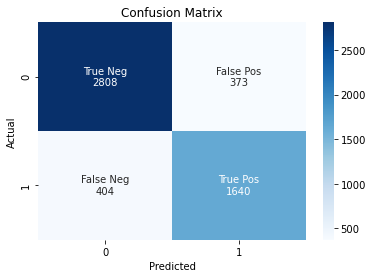

In [43]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts_dtree = ["{0:0.0f}".format(value) for value in matrix_dtree.flatten()]

group_counts_dtree = ["{0:0.0f}".format(value) for value in matrix_dtree.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts_dtree)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_dtree, annot=labels, fmt='', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [44]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3181
           1       0.81      0.80      0.81      2044

    accuracy                           0.85      5225
   macro avg       0.84      0.84      0.84      5225
weighted avg       0.85      0.85      0.85      5225



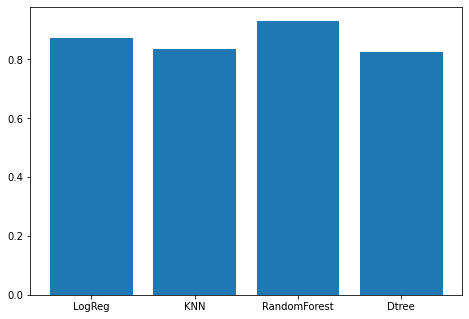

In [66]:
logreg_bestscore = gs_logreg.best_score_
knn_bestscore = gs_knn.best_score_
rf_bestscore = gs_rf.best_score_
dtree_bestscore = gs_dtree.best_score_

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ['LogReg', 'KNN', 'RandomForest', 'Dtree']
y_axis = [logreg_bestscore, knn_bestscore, rf_bestscore, dtree_bestscore]
ax.bar(x_axis,y_axis)
plt.show()

# PCA (Tan Yuan Jie)

In [45]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_cluster[["t1","t2","hum","wind_speed"]])

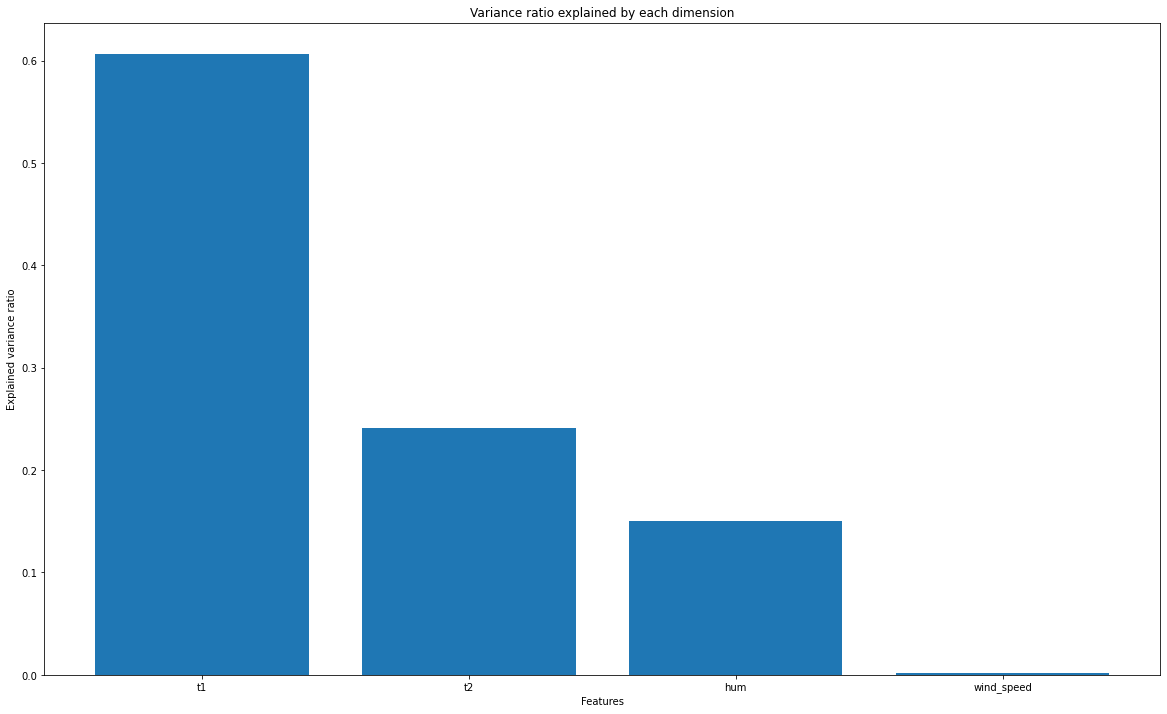

In [46]:
from sklearn.decomposition import PCA
plt.figure(figsize=(20,12))
pca = PCA(random_state=0).fit(scaled)
features = ["t1","t2","hum","wind_speed"]
plt.bar(features, pca.explained_variance_ratio_)
plt.title('Variance ratio explained by each dimension')
plt.xlabel('Features')
plt.ylabel('Explained variance ratio')
plt.show()

In [47]:
pca = PCA(n_components = 0.8, random_state=0).fit(scaled)
transformed = pca.transform(scaled)
print(pca.explained_variance_ratio_)

[0.60673151 0.24081326]


# KMeans Clustering Algorithm (Tan Yuan Jie)

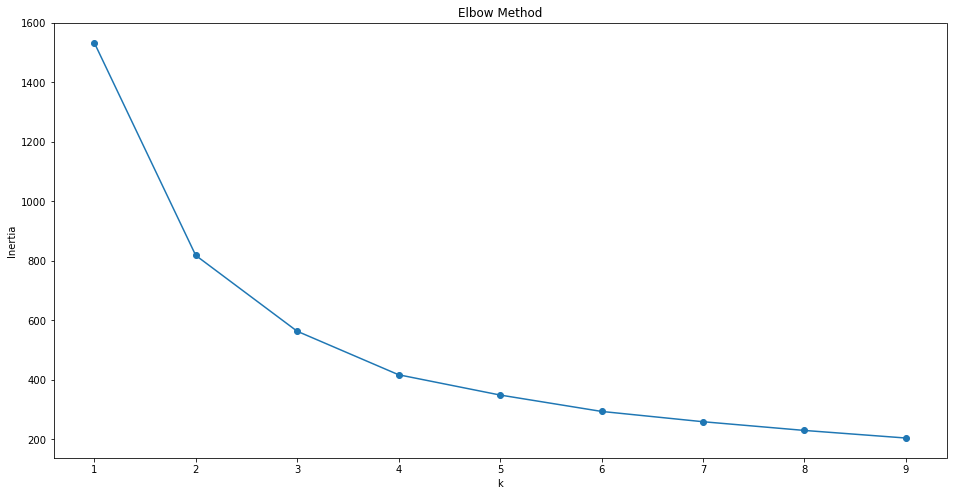

In [48]:
from sklearn.cluster import KMeans

#Elbow Method to determine the number of cluster(k)
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(transformed)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

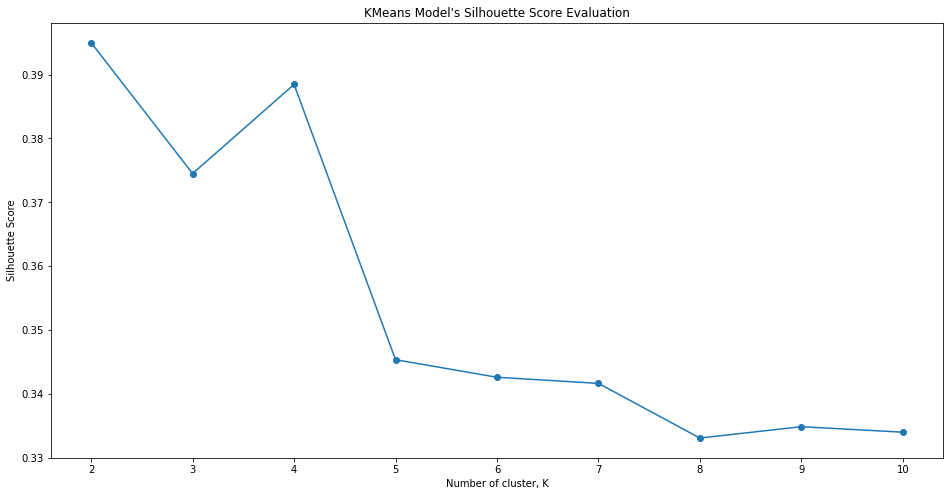

In [49]:
#Silhouette score evaluation to determine the number of cluster(k)
from sklearn.metrics import silhouette_score
kmn_silhouette_score = []
nCluster = range(2,11)
for k in nCluster:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    labels = kmeanModel.fit_predict(transformed)
    kmn_silhouette_score.append(silhouette_score(transformed, labels))
plt.figure(figsize=(16,8))
plt.plot(nCluster, kmn_silhouette_score, 'o-')
plt.title('KMeans Model\'s Silhouette Score Evaluation')
plt.xlabel('Number of cluster, K')
plt.ylabel('Silhouette Score')
plt.show()

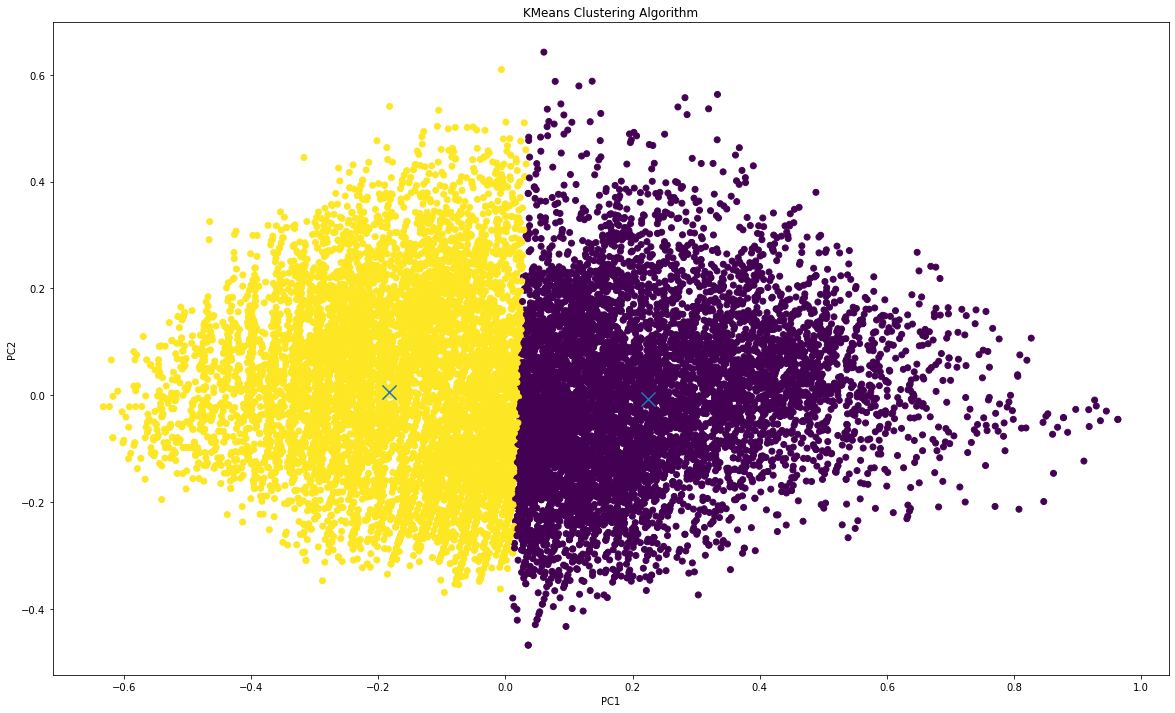

In [50]:
#KMeans algorithm
plt.figure(figsize=(20,12))
kmn = KMeans(n_clusters=2, random_state=0)
kmn.fit(transformed)
labels = kmn.predict(transformed)
xs =transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=labels)
centroids = kmn.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x',s=200)
plt.title('KMeans Clustering Algorithm')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [51]:
#KMeans Inertia
print(kmn.inertia_)

818.4107717925727


In [52]:
#KMeans Silhouette Score
print(silhouette_score(transformed, labels))

0.3950037612330866


In [53]:
#KMeans
#Mean of columns grouped by clusters
df_cluster['cluster']=labels
df_cluster[["cnt","t1","t2","hum","wind_speed","cluster"]].groupby(['cluster']).mean()

,t1,t2,hum,wind_speed
cluster,,,,
0,17.184399,17.126535,63.620013,17.810422
1,8.623862,6.951671,79.420289,14.366540


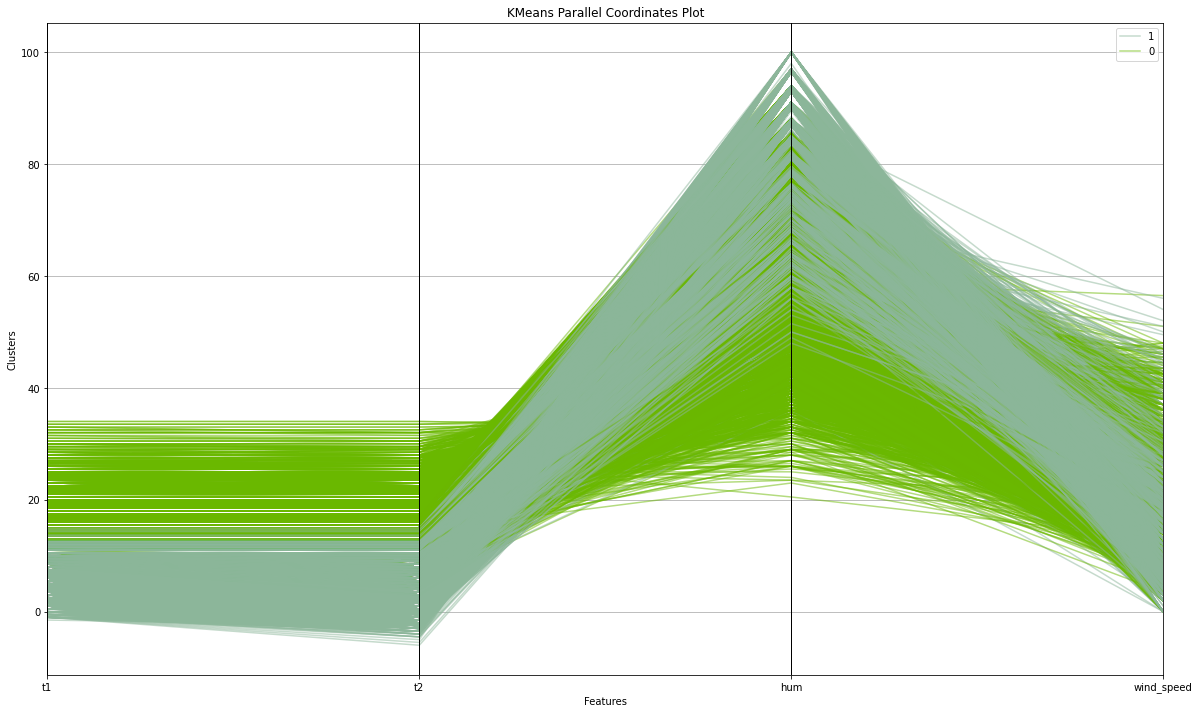

In [54]:
#KMeans
#Differences between two clusters
plt.figure(figsize=(20,12))
pd.plotting.parallel_coordinates(df_cluster,'cluster', cols=["t1","t2","hum","wind_speed"], alpha = 0.5)
plt.title("KMeans Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

In [55]:
# Gaussian Mixture Model Clustering Algorithm (Tan Yuan Jie)

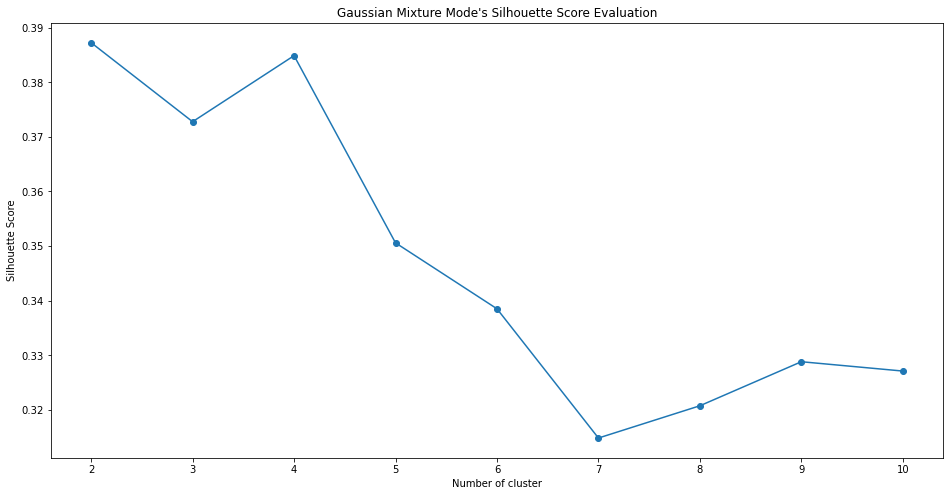

In [56]:
from sklearn.mixture import GaussianMixture
#Silhouette score evaluation to determine the number of cluster(n)
gmm_silhouette_score = []
for n in nCluster:
    gmm = GaussianMixture(n_components=n, random_state=0)
    labels = gmm.fit_predict(transformed)
    gmm_silhouette_score.append(silhouette_score(transformed, labels))
plt.figure(figsize=(16,8))
plt.plot(nCluster, gmm_silhouette_score, 'o-')
plt.title('Gaussian Mixture Mode\'s Silhouette Score Evaluation')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.show()

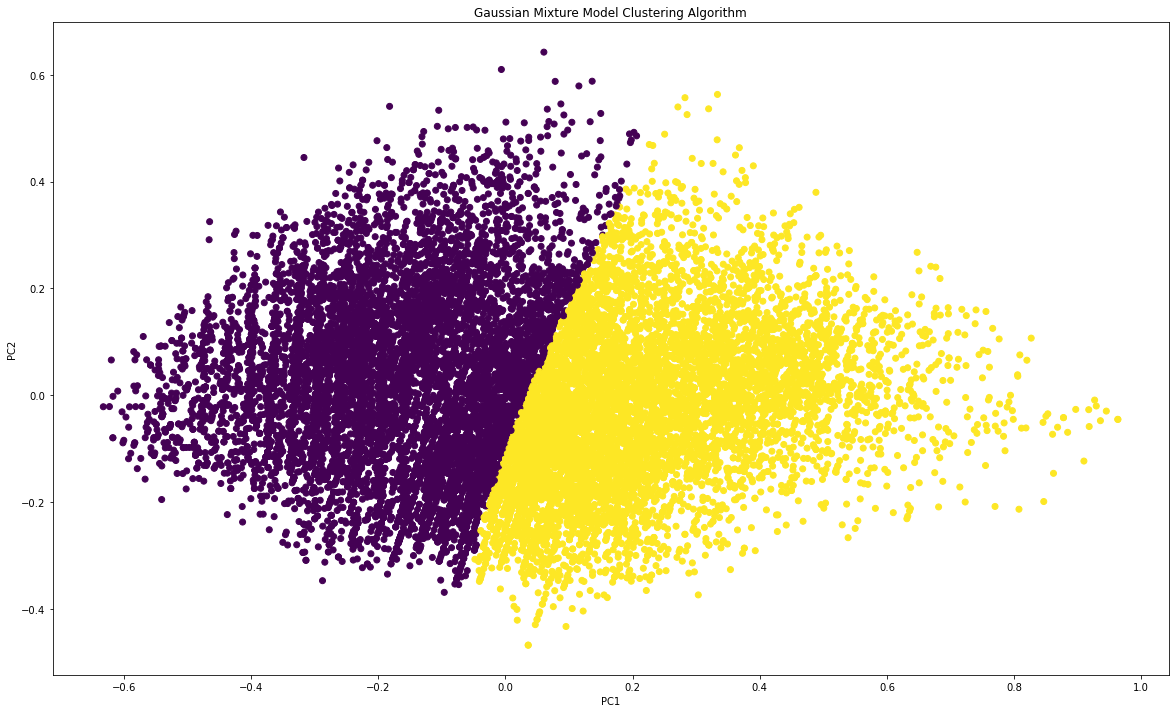

In [57]:
#GMM Algorithm
plt.figure(figsize=(20,12))
gmm = GaussianMixture(n_components=2).fit(transformed)
labels = gmm.predict(transformed)
plt.scatter(transformed[:,0],transformed[:,1], c=labels)
plt.title('Gaussian Mixture Model Clustering Algorithm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [58]:
#GMM Silhouette Score
print(silhouette_score(transformed, labels))

0.38726917368536734


In [59]:
#GMM
#Mean of columns grouped by clusters
df_cluster['cluster']= labels
df_cluster[["cnt","t1","t2","hum","wind_speed","cluster"]].groupby(['cluster']).mean()

,t1,t2,hum,wind_speed
cluster,,,,
0,8.518134,6.838270,78.205240,15.134624
1,17.462809,17.441938,64.889337,16.897399


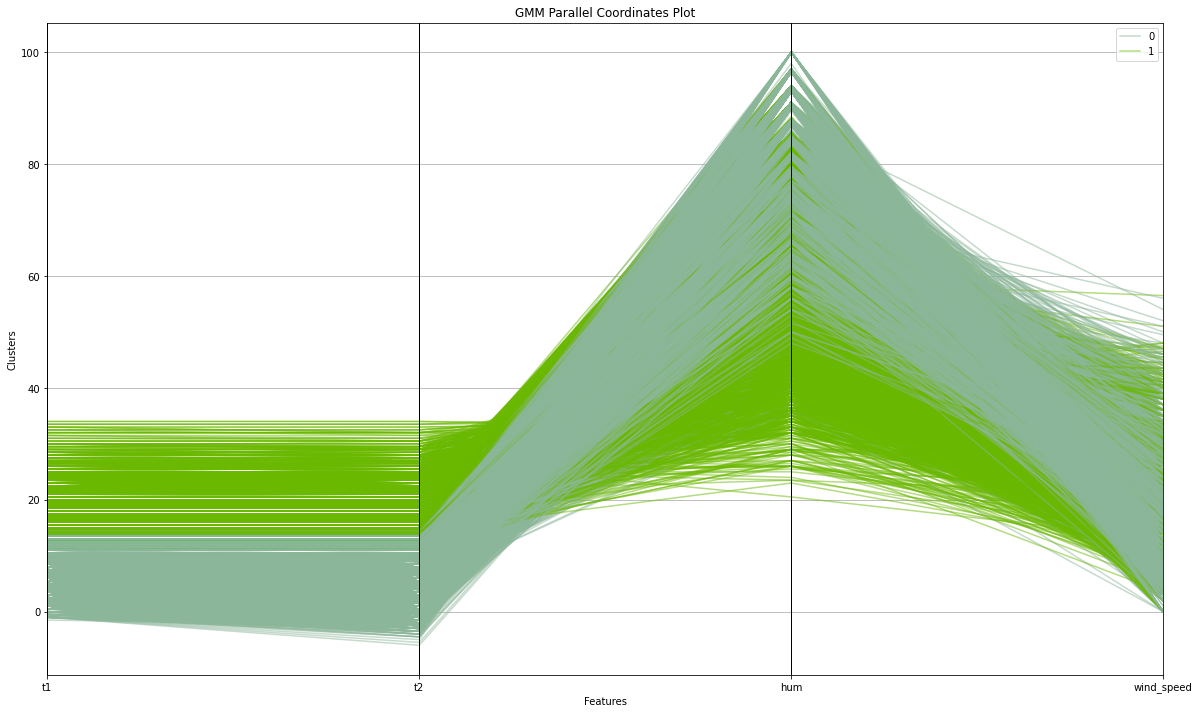

In [60]:
#GMM
#Differences between two clusters
plt.figure(figsize=(20,12))
pd.plotting.parallel_coordinates(df_cluster,'cluster', cols=["t1","t2","hum","wind_speed"], alpha = 0.5)
plt.title("GMM Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

# Association Rule

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df_assc_rule=pd.read_excel("text_paragraph.xlsx")

In [4]:
df_assc_rule.shape

(12, 1)

In [5]:
df_assc_rule['transactions']= df_assc_rule['transactions'].str.strip()
df_assc_rule

,transactions
0,Car ownership in South-East Asian markets may ...
1,The Nielsen Global Survey of Automotive Demand...
2,"Malaysia, however, bucks the trend, with 93% c..."
3,"Despite the overall low ownership, the region’..."
4,"Indonesia, Philippines, Thailand and Malaysia ..."
5,“Historically automotive demand in South-East ...
6,“We have seen those tables turn in a big way i...
7,Intention to upgrade among car owners here is ...
8,More than nine in 10 Indonesian car owners (94...
9,"Only Singapore fell below the global average, ..."


In [6]:
#Stop Words Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopWords = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YuanJie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
words = []
for sentences in df_assc_rule['transactions']:
    word = sentences.lower().replace('.', '').split()
    words.append(word)
wordList = [word for sublist in words for word in sublist if not word in stopWords]

In [8]:
def countWords(word, transactions):
    occurrence = []
    for sentences in transactions:
        count = 0
        words = sentences.lower().replace('.', '').split()
        for item in words:
            if(word == item):
                count = 1
        occurrence.append(count)
    return occurrence

In [9]:
for word in wordList:
    df_assc_rule[word] = countWords(word, df_assc_rule['transactions'])

In [10]:
df_assc_rule.drop("transactions", axis=1, inplace=True)
df_assc_rule

,car,ownership,south-east,asian,markets,may,among,world’s,lowest,–,...,status,"(79%),",(72%),followed,"in,","(67%),",(62%),(54%),compares,52%
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Build Apriori algorithm
frq_items = apriori(df_assc_rule, min_support = 0.2, use_colnames = True)
frq_items

,support,itemsets
0,0.750000,(car)
1,0.250000,(ownership)
2,0.333333,(south-east)
3,0.250000,(malaysia)
4,0.416667,(globally)
5,0.250000,(highest)
6,0.250000,(automotive)
7,0.250000,(demand)
8,0.250000,"(years,)"
9,0.250000,(global)


In [12]:
#Create association rules
association_rules(frq_items, metric ="lift", min_threshold = 1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(car),(ownership),0.750000,0.250000,0.250000,0.333333,1.333333,0.062500,1.125
1,(ownership),(car),0.250000,0.750000,0.250000,1.000000,1.333333,0.062500,inf
2,(south-east),(car),0.333333,0.750000,0.333333,1.000000,1.333333,0.083333,inf
3,(car),(south-east),0.750000,0.333333,0.333333,0.444444,1.333333,0.083333,1.200
4,(malaysia),(car),0.250000,0.750000,0.250000,1.000000,1.333333,0.062500,inf
...,...,...,...,...,...,...,...,...,...
71,"(demand, automotive)","(south-east, car)",0.250000,0.333333,0.250000,1.000000,3.000000,0.166667,inf
72,(south-east),"(car, demand, automotive)",0.333333,0.250000,0.250000,0.750000,3.000000,0.166667,3.000
73,(car),"(south-east, demand, automotive)",0.750000,0.250000,0.250000,0.333333,1.333333,0.062500,1.125
74,(demand),"(south-east, car, automotive)",0.250000,0.250000,0.250000,1.000000,4.000000,0.187500,inf
